# **Customer Analytics with Python.** 

## **A brief marketing introduction.** 

### **Segmentation, targeting, positioning. (STP Framework)**

#### KYC : Know your customer.

#### B2C business model : the clients are individual people rather than institutions or firms. 

#### The data came from a Fast-moving consumer goods company (FMCG company) like a supermarket. 

### a) _Segmentation_: 

#### Dividing a population into groups with similar characteristics. This groups hace comparable purchase behaviors. This segments will response similarly to different marketing activities. 

#### Different segments may respond differently to marketing activities. 

#### Marketers rely on demographic and geographic data. 

#### Marketers rely sometimes in Psychographic and Behavioral data, this states that some customers are more impulsive and others are more controlled when buying.  

#### **Behavioral data**  is preferred because it provides historic data like purchase frequency, how often customer buy, at what time they buy, what quantities they buy, product ratings. 

### b) _Targeting_: 


#### Evaluating potential profits from segments and deciding which segments to focus on. 

#### We can decide to offer products to some segments. 

#### There are some factors in consideration like segment size, expected growth, competitorps offerings. 

#### Here we decide the different ways to promote our products. We can taget one segment on the TV and one online. 

#### Targeting is 'advertising' territory, it envolves psycology and behavioral understanding of the customers. 


### c) _Positioning_: 
 
#### In this step we answer the question, What product would have the closest characteristics to customer's needs. It also contemplates how we should present the product to the customer and by what channels. 

#### It consist on implementing the targeting actions for the product. 

#### It has a framework called Marketing Mix. 

### _Marketing Mix_

#### Develop the best product and offer it at the right price through the right channels. 

### _3 important questions in customer analytics refering to marketing mix_

####  Will a customer buy a product from a particular product category when they enter the shop. 

#### Which brand is the customer going to choose. 

#### How many units is the customer going to purchase. 

### In marketing mix we have 4 groups of variables: 

* Product characteristics.
* Price of offering. 
* Promotions.
* Place or channel of offering.

### _This are the 4 p's of marketing_. 

#### Product: features of it: color, desing, branding, packaging. 

#### Price: How much the product cust, long-term price change, discounts

#### Promotion : How the product is being communicated or advertised. 

#### Sales promotions : Price reduction , display (where the products are placed in a store) and feature (like James bond cars). 

#### Place :  Where the product will be offered or distributed. It can be made by 3 different ways. 

#### Intensive distribution: Many different stores around the world.

#### Selective distribution: Where are the best places to sell the product. 

#### Exclusice distribution: Luxury items or high status image. 


### **Physical vs Online stores**.

#### In this notebook there are 4 relevant questions:

#### 1) KYC (Know your customer) Who are the customers and what customer  segments are there? 

#### 2) Will a customer buy a product for a particular category when they enter the store? (purchase probability)

#### 3) Which brand is the customer going to choose? (brand choice probability)

#### 4) How many units is the customer going to purchase? (purchase quantity)


### **Price Elasticity**

#### Price elasticity measures how purchasing behavior changes when the price changes. 

#### Cross-price elasticity: how the purchase behavior change when taking into account the competition. Will the customers change to the competition product if the price of my product is higher?  In the example of coca-cola and pepsi it is called 'Price elasticity of Coca-Cola demand with respect to the price of Pepsi'. 

#### Price elasticity is related with what is called supply and demand.

#### The cheaper the product - the higher the demand and vice versa.

#### There is an sweet spot where we achieve and optimal revenue. Revenue is calculated as price x Units sold. 

#### In economic terms, Price elasticity (E) is calculated as: 

#### $E$ = %change in economic outcome of interest (number of units sold)  (Y)/ 1% change price. (P)

#### $E$ = $\frac{Y}{P}$ = $Y_{t}-Y_{t-1}/Y_{t-1}$ / $P_{t}-P_{t-1}/P_{t-1}$

#### We will look at price elasticity of purchase probability, brand choice probability and purchase quantity. 

#### Price elasticity of purchase probability: The greater the price the lower the customer will buy. If we have several beers and we calculate and aggregate price for beers, if the aggregate price goes up, the price elasticity will show s how much would the purchasing quantity decrease. 

#### Price elasticity for brand choice: IF the price of a certain brand increases the brand choice probability decreases. When computing the price elasticity it will tell us How much the brand choice probability of our brand would increase with a one percent increase in the price of a competing brand. 

#### Price elasticity for purchase quantity: the higher the price the less products the customer will buy. 



# **1) Customer Segmentation.**

### **Dataset**:

#### Data from 2000 individuals for a given area. It is a sample that represents the whole country. 

#### They enter and FMCG store, and the data has been recollected using a loyalty card. 

#### **Dataset variables**. 

| Variable        | Type         | Range     | Description                                                                                                                                                       |
|-----------------|--------------|-----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID              | numerical    | Integer   | Unique identifier of a customer                                                                                                                                   |
| Sex             | categorical  | {0,1}     | Sex of a customer.<br>0-Male <br>1-Female                                                                                                                         |
| Marital status  | categorical  | {0,1}     | Marital status of a customer.<br>0-Single <br>1-non-single(divorced/separated/married/widowed)                                                                    |
| Age             | numerical    | Integer   | Age of a customer.                                                                                                                                                |
| Education       | categorical  | {0,1,2,3} | Level of education of a customer. <br>0-other/unknown<br>1-high school <br>2-university<br>3-graduate school                                                      |
| Income          | numerical    | Real      | Self-reported annual income in US dollars of the customer.                                                                                                        |
| Occupation      | categorical  | {0,1,2}   | Category of occupation of the customer. <br>0-unemployed/unskilled<br>1-skilled employee/official<br>2-management/self-employed/highly qualified employee/officer |
| Settlement size | categorical  | {0,1,2}   | The size of the city that the customer lives in. <br>0-small city <br>1-mid-sized city <br>2-big city                                                             |

## **Exploratory data analysis**.

### **Libraries**

In [95]:
import scipy 
import pickle
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from scipy.cluster.hierarchy import dendrogram,linkage

sns.set()

In [43]:
df_segmentation = pd.read_csv("segmentation data.csv",index_col=0)

In [44]:
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [29]:
df_segmentation.size

14000

In [30]:
df_segmentation.shape

(2000, 7)

In [31]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


### **Correlation Estimate**. 

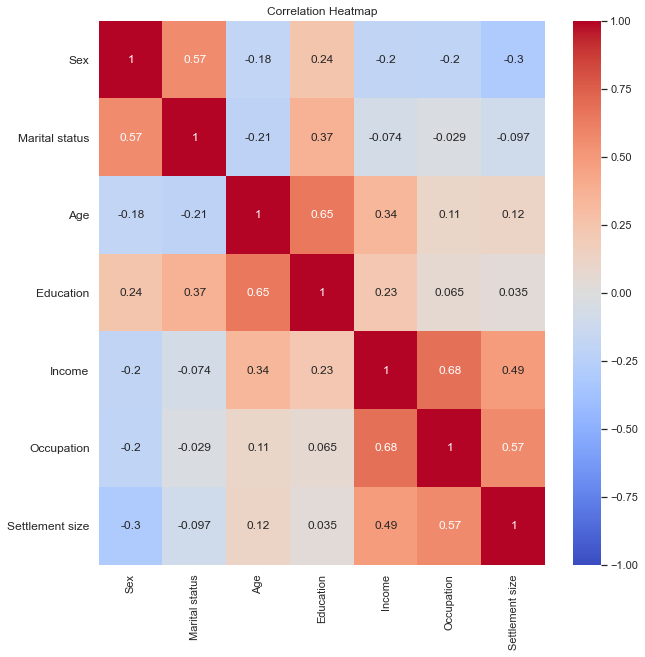

In [32]:
plt.figure(figsize=(10,10))
s = sns.heatmap(df_segmentation.corr(), vmin=-1, cmap = "coolwarm",annot=True)
s.set_yticklabels(s.get_yticklabels(),rotation = 0,fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

In [33]:
df_segmentation.columns

Index(['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation',
       'Settlement size'],
      dtype='object')

### **Visualizing raw data**

Text(0.5, 1.0, 'Visualization of raw data Income vs Age')

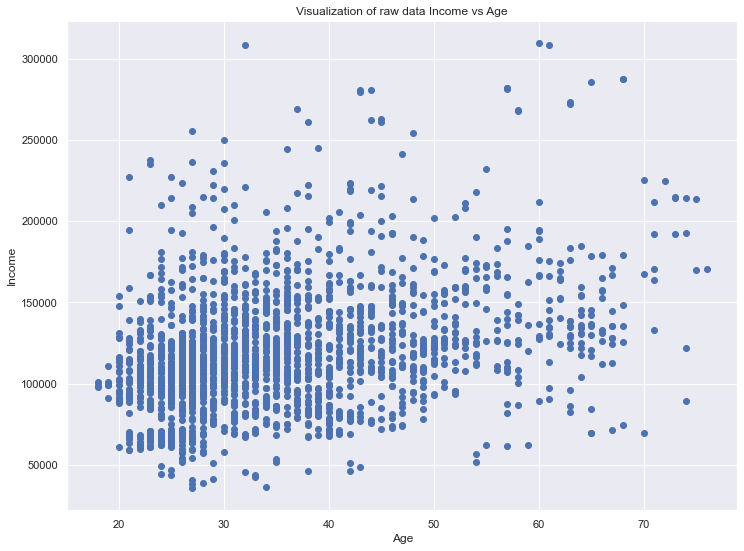

In [34]:
plt.figure(figsize=(12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization of raw data Income vs Age')

### **Data Standardization**. 

In [45]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(df_segmentation)

In [46]:
segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

## **1.1) Hierarchical Clustering.**

### There are two types of Hierarchical clustering. 

* Divisive (Top Down)
* Agglomerative (Bottom up)

### Divisive: at the begining all observations are in the same cluster like the animal kingdom.

### Agglomerative: the level of glanurality of the clusters is higher, there are a lot of different groups at the beginning and then we start to grouping them to form bigger clusters each time. It is easier mathematically. 
  
### How do we measure the distances between observations?

### We need to calculate also the distance between clusters. For segmentation we have the ward method.


### The ward method calculates the square of the distances between clusters.



### **Hierarchical clustering implementation using dendrogram**.

### A dendogram is a tree-like, hierarchical representation of points.

### linkage states the specific method we employed. 

In [47]:
hier_clust = linkage(segmentation_std,method='ward')

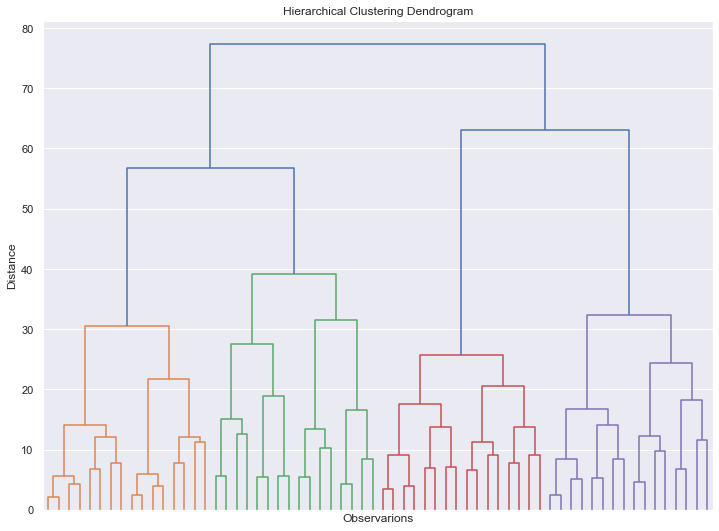

In [48]:
plt.figure(figsize =(12,9))

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observarions')
plt.ylabel('Distance')

dendrogram(hier_clust,
           truncate_mode= 'level',
           p =5,
           show_leaf_counts = False,
           no_labels = True
          )

plt.show()


### Distances between points are represented by the vertical lines. The smaller the distance between points, the further down in the tree they will be group together. A join between to clusters is represented by a horizontal line. 

### Here we have 4 clusters for our data. 

## **1.2) K-Means clustering.**


#### 1) How many clusters we will like to have. (K)

#### 2) Specify the cluster seed or centroid. 

#### 3) Assign each point to a seed based on proximity (euclidean squared distance : sensitive to outliers). 

#### 4) Calculate the centroid or the geometrical center. 

#### 5) Repeat the previous steps.


### K-means enforces spherical clusters. 

### K-means doesn´t tells us how many clusters they are. Instead it minimizes the euclidean norm. 

### We can assume there are two clusters at the beggining and then calculate the sum of squared distances within each clusters. Then with 3 clusters and compared the two results. 

### WCSS : within cluster sum of squares, it is the sum of the variance between the observations in each clusters. 




In [52]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans.fit(segmentation_std)
    wcss.append(kmeans.inertia_)

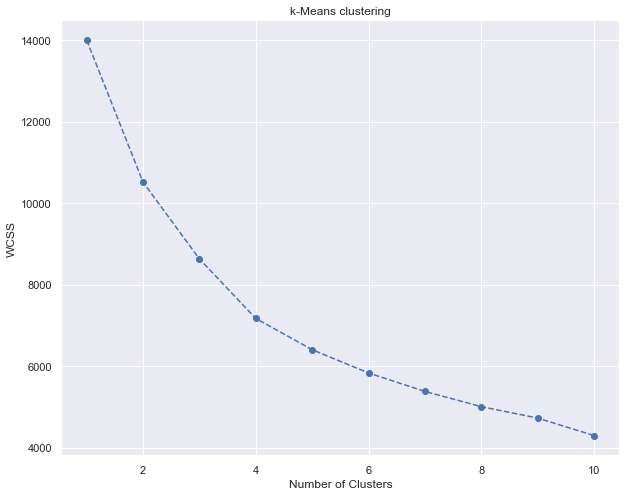

In [53]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('k-Means clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

### Based on the elbow method we have 4 clusters. 

In [56]:
kmeans = KMeans(n_clusters=4 ,init = 'k-means++', random_state=42)

In [57]:
kmeans.fit(segmentation_std)

KMeans(n_clusters=4, random_state=42)

In [58]:
df_segm_kmeans = df_segmentation.copy()
df_segm_kmeans['Segment K-means'] = kmeans.labels_

In [59]:
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807


### Segment 0:  it is composed by men ar women almost equally, with an average age of 56, this is the oldest segment. They have the highest level of education and income and 2/3 are in a relationship. 

In [61]:
df_segm_analysis['N Obs'] = df_segm_kmeans[['Segment K-means', 'Sex']].groupby(['Segment K-means']).count()

In [62]:
df_segm_analysis['Prop Obs'] = df_segm_analysis['N Obs']/df_segm_analysis['N Obs'].sum()

In [63]:
df_segm_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
0,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
2,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
3,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [64]:
df_segm_analysis.rename({0:'well-of',
                         1:'fewer opportunities',
                         2:'standard segment',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N Obs,Prop Obs
Segment K-means,,,,,,,,,
well-of,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266,263,0.1315
fewer opportunities,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290,462,0.2310
standard segment,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695,705,0.3525
career focused,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807,570,0.2850


In [66]:
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-of',
                                                                1:'fewer opportunities',
                                                                2:'standard segment',
                                                                3:'career focused'})

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


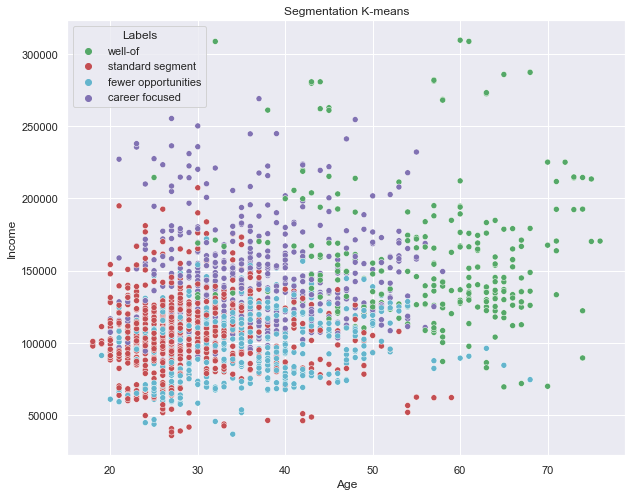

In [67]:
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis,hue=df_segm_kmeans['Labels'],palette = ['g','r','c','m'])
plt.title('Segmentation K-means')
plt.show()

### It is not a good result, so we can implement principal component analysis to get a better one. 

## **1.3) Dimensionality reduction**

### How it works?

### Lets supose we have a dataset with 3 variables. So a point i can be denoted as a vector [Xi,Yi,Zi].

### In some cases we can find a place close to the data, which axes can be denoted as u and v. Not all points lay on this plane but it is an approximation. 

### We end up converting our 3D data into 2D data, some information is lost but the total number of features is reduced. 

### **1.3.1) PCA**

In [69]:
pca = PCA()

In [70]:
pca.fit(segmentation_std)

PCA()

### PCA creates as many components as features we have in our data. The components are arrenged in order of importance. 

### Importance means  how much of the variance of the data is explained by each component. 

In [71]:
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

### All this components sum up to 1. 

### The task now is to find a subset of components, while preserving variance.  

Text(0, 0.5, ' Cummulative Explained variance')

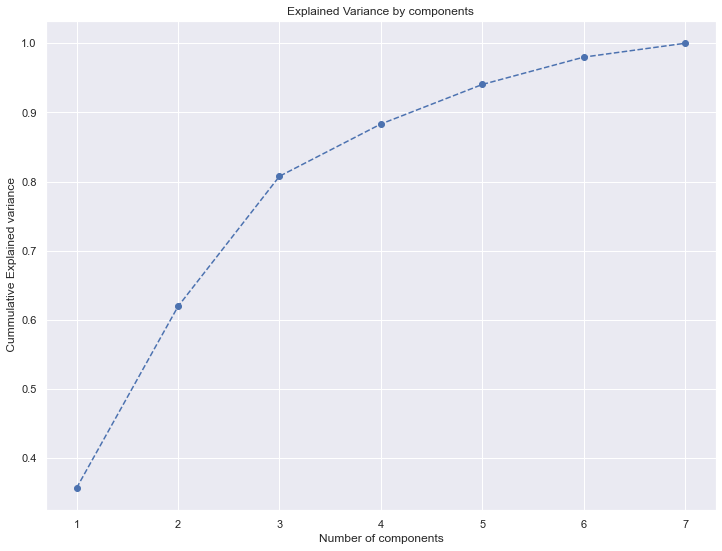

In [72]:
plt.figure(figsize=(12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o',linestyle = '--')
plt.title('Explained Variance by components')
plt.xlabel('Number of components')
plt.ylabel(' Cummulative Explained variance')

### We will choose the first 3 components. 

In [73]:
pca = PCA(n_components=3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [74]:
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

#### This values are called loadings, loadings are the correlation between an original variable and a component. 

In [75]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns= df_segmentation.columns.values,
                           index = ['Component 1', 'Component 2','Component 3'])

In [76]:
df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x29225fc4ee0>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3')])

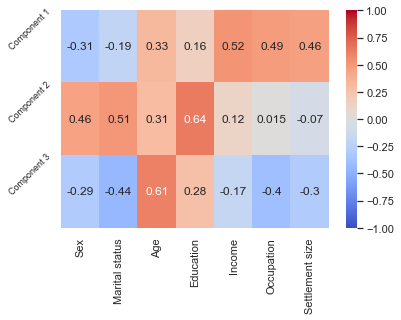

In [77]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1,
            cmap = 'coolwarm',
            annot = True)

plt.yticks([0,1,2],
           ['Component 1','Component 2', 'Component 3'],
           rotation = 45, fontsize = 9 )

### There is a positive correlation between component 1 and Age, Education, Income, Occupation and Settlement size.  This component is related with the carrer focus of an individual. 

### The second component is more related to the individual, lifestyle and principal demographic information. 

### Regarding the third component, marital status, age and occupation are the most important features. Marital status and occupation load negatively. We determine the importance of the individual loadings with respect their individual values. This component indicates the experience a person have, it doesn't matter if it is life experience or workexperience. 

### We now transform our data using only the 3 components. The pca scores. 

In [79]:
scores_pca = pca.transform(segmentation_std)

### The pca scores are standarized by definition so we do not need to standarize them. 

## **1.4) K-means clustering with PCA.**

In [80]:
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i,init = 'k-means++',random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

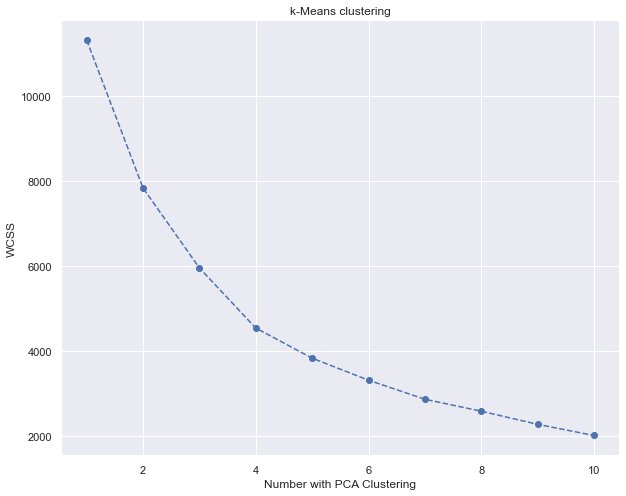

In [81]:
plt.figure(figsize = (10,8))
plt.plot(range(1,11), wcss, marker = 'o', linestyle = '--')
plt.title('k-Means clustering')
plt.xlabel('Number with PCA Clustering')
plt.ylabel('WCSS')
plt.show()

In [82]:
kmeans_pca = KMeans(n_clusters=4 ,init = 'k-means++', random_state=42)

In [83]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

In [84]:
df_segm_pca_kmeans = pd.concat([df_segmentation.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)


In [86]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,0,1,2
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909


In [87]:
df_segm_pca_kmeans.columns.values[-3:] = ['Component 1','Component 2','Component 3']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [88]:
df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [89]:
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


#### The first component is related to career, the second to education and lifestule and the third one to experience (work and life)

In [91]:
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA', 'Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs']/df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard',1:'career focused',2:'fewer opportunities',3:'well-off'})

In [92]:
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


### We can  plot the data using the first two components in a 2D plane because they are the ones that explain the higher variability of the data. 

In [93]:
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard',1:'career focused',2:'fewer opportunities',3:'well-off'})

C:\Users\david\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


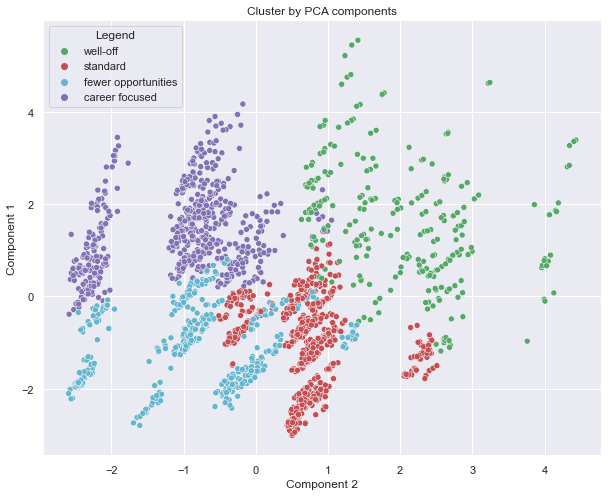

In [94]:
x_axis = df_segm_pca_kmeans['Component 2']
y_axis = df_segm_pca_kmeans['Component 1']
plt.figure(figsize=(10,8))
sns.scatterplot(x_axis,y_axis, hue = df_segm_pca_kmeans['Legend'],palette=['g','r','c','m'])
plt.title('Cluster by PCA components')
plt.show()

### The components are othogonal, this means that the difference between components is as big as possible.     

## **1.5) Data Export**

In [96]:
pickle.dump(scaler,open('scaler.pickle','wb'))

In [97]:
pickle.dump(pca,open('pca.pickle','wb'))

In [98]:
pickle.dump(kmeans_pca,open('kmeans_pca.pickle','wb'))